Julia Warner

CAP 4630

HW2, Problem 3

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Loading the CIFAR10 data set

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Pre-process the dataset

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Model that underfits

In [0]:
#set up the layers
model_underfit = keras.Sequential([
    keras.layers.Conv2D(2, kernel_size=3, activation=tf.nn.relu, input_shape=(32, 32, 3)),
    keras.layers.Conv2D(2, kernel_size=3,  activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
#compile the model
model_underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [86]:
#train the model
epochs_underfit = 10
history_underfit = model_underfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs_underfit,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 36s 722us/sample - loss: 1.9332 - acc: 0.2902 - val_loss: 1.8378 - val_acc: 0.3348
Epoch 2/10
50000/50000 [==============================] - 36s 718us/sample - loss: 1.7947 - acc: 0.3579 - val_loss: 1.7551 - val_acc: 0.3799
Epoch 3/10
50000/50000 [==============================] - 36s 729us/sample - loss: 1.7104 - acc: 0.3950 - val_loss: 1.7150 - val_acc: 0.3947
Epoch 4/10
50000/50000 [==============================] - 36s 719us/sample - loss: 1.6580 - acc: 0.4169 - val_loss: 1.6807 - val_acc: 0.4080
Epoch 5/10
50000/50000 [==============================] - 36s 724us/sample - loss: 1.6189 - acc: 0.4297 - val_loss: 1.6795 - val_acc: 0.3992
Epoch 6/10
50000/50000 [==============================] - 36s 727us/sample - loss: 1.5900 - acc: 0.4388 - val_loss: 1.6447 - val_acc: 0.4134
Epoch 7/10
50000/50000 [==============================] - 36s 719us/sample - loss: 1.5688 - acc: 0.4451 

In [0]:
#get the training history
history_dict_underfit = history_underfit.history
acc_values_underfit = history_dict_underfit['acc']
test_acc_values_underfit = history_dict_underfit['val_acc']
loss_values_underfit = history_dict_underfit['loss']
test_loss_values_underfit = history_dict_underfit['val_loss']
epochs_range_underfit = range(1, epochs_underfit+1)

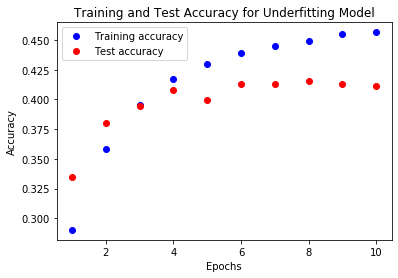

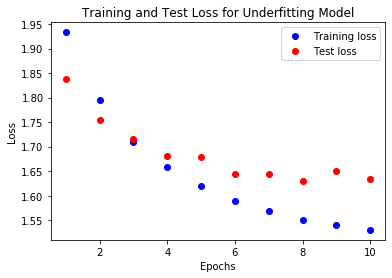

In [88]:
#visualize the results

#accuracy
plt.plot(epochs_range_underfit, acc_values_underfit, 'bo', label='Training accuracy')
plt.plot(epochs_range_underfit, test_acc_values_underfit, 'ro', label='Test accuracy')
plt.title('Training and Test Accuracy for Underfitting Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss
plt.plot(epochs_range_underfit, loss_values_underfit, 'bo', label='Training loss')
plt.plot(epochs_range_underfit, test_loss_values_underfit, 'ro', label='Test loss')
plt.title('Training and Test Loss for Underfitting Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This model underfits mainly because it was not trained for enough epochs. Additionally, the training accuraccy appears to beginning slowing in its increase at a low accuracy rate, which is also a sign of underfitting. 

## Model that overfits

In [0]:
#set up the layers
model_overfit = keras.Sequential([
    keras.layers.Conv2D(100, kernel_size=3,  activation=tf.nn.relu, input_shape=(32, 32, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
#compile the model
model_overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [91]:
#train the model
epochs_overfit = 20
history_overfit = model_overfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs_overfit,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.4593 - acc: 0.4932 - val_loss: 1.3368 - val_acc: 0.5323
Epoch 2/20
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.1933 - acc: 0.5880 - val_loss: 1.2473 - val_acc: 0.5688
Epoch 3/20
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.0533 - acc: 0.6366 - val_loss: 1.2978 - val_acc: 0.5535
Epoch 4/20
50000/50000 [==============================] - 75s 1ms/sample - loss: 0.9124 - acc: 0.6849 - val_loss: 1.3802 - val_acc: 0.5501
Epoch 5/20
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.7826 - acc: 0.7312 - val_loss: 1.2935 - val_acc: 0.5911
Epoch 6/20
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.6662 - acc: 0.7711 - val_loss: 1.2783 - val_acc: 0.6066
Epoch 7/20
50000/50000 [==============================] - 75s 1ms/sample - loss: 0.5709 - acc: 0.8052 - val_loss: 1.

In [0]:
#get the training history
history_dict_overfit = history_overfit.history
acc_values_overfit = history_dict_overfit['acc']
test_acc_values_overfit = history_dict_overfit['val_acc']
loss_values_overfit = history_dict_overfit['loss']
test_loss_values_overfit = history_dict_overfit['val_loss']
epochs_range_overfit = range(1, epochs_overfit+1)

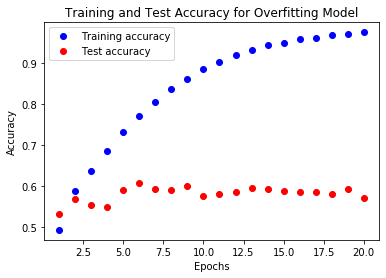

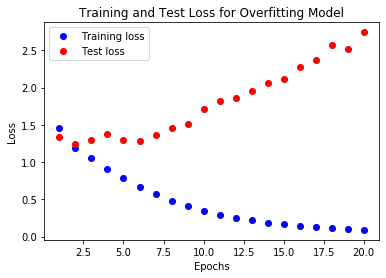

In [93]:
#visualize the results

#accuracy
plt.plot(epochs_range_overfit, acc_values_overfit, 'bo', label='Training accuracy')
plt.plot(epochs_range_overfit, test_acc_values_overfit, 'ro', label='Test accuracy')
plt.title('Training and Test Accuracy for Overfitting Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss
plt.plot(epochs_range_overfit, loss_values_overfit, 'bo', label='Training loss')
plt.plot(epochs_range_overfit, test_loss_values_overfit, 'ro', label='Test loss')
plt.title('Training and Test Loss for Overfitting Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This model overfits by an extreme amount, as show by the loss actually increasing for the testing data set. This model is too complex and trains for too long. 

## Model that is "pretty good"

In [0]:
#set up the layers
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3,  activation=tf.nn.relu, input_shape=(32, 32, 3)),
    keras.layers.Conv2D(16, kernel_size=3,  activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
#compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [102]:
#train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 109s 2ms/sample - loss: 1.4346 - acc: 0.4903 - val_loss: 1.2288 - val_acc: 0.5645
Epoch 2/10
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.1421 - acc: 0.6012 - val_loss: 1.1347 - val_acc: 0.5988
Epoch 3/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 1.0221 - acc: 0.6437 - val_loss: 1.1154 - val_acc: 0.6189
Epoch 4/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.9373 - acc: 0.6744 - val_loss: 1.1314 - val_acc: 0.6104
Epoch 5/10
50000/50000 [==============================] - 111s 2ms/sample - loss: 0.8676 - acc: 0.6981 - val_loss: 1.1255 - val_acc: 0.6128
Epoch 6/10
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.8060 - acc: 0.7173 - val_loss: 1.1503 - val_acc: 0.6059
Epoch 7/10
50000/50000 [==============================] - 108s 2ms/sample - loss: 0.7460 - acc: 0.7390 - val_l

In [0]:
#get the training history
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

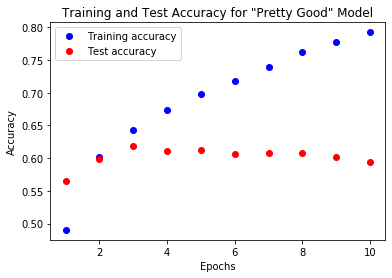

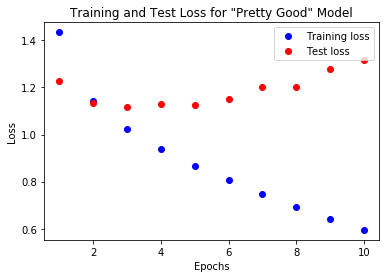

In [104]:
#visualize the results

#accuracy
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and Test Accuracy for "Pretty Good" Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and Test Loss for "Pretty Good" Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This model overfits to a large degree as well, but it obtains a slights higher accuracy and a slightly lower loss, and the gap between testing and training isn't as large, so it qualifies as "pretty good". 